# Kaggle - Titanic

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from titanic import *

## Import Data

**Import: `train` data**

In [2]:
filename = 'data/train.csv'
df_train = import_data(filename)
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Import: `test` data**

In [3]:
filename = 'data/test.csv'
df_test = import_data(filename)
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Concatedate `train` and `test` dataframes**

In [4]:
df = concatenate_dataframes(df_train, df_test)

## Feature Creation

In [5]:
df = create_features(df, standardize=True)

In [6]:
df.head(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,grouped_title,title_class,Age
0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,NaN,S,Mr,low,mr,mr_3,-0.544763
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C85,C,Mrs,high,mrs_ms_lady,mrs_ms_lady_1,0.657863
2,1.0,3,"Heikkinen, Miss. Laina",female,0,0,NaN,S,Miss,high,mrs_ms_lady,mrs_ms_lady_3,-0.244106


In [7]:
df.tail(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,grouped_title,title_class,Age
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,NaN,S,Mr,low,mr,mr_3,0.695445
1307,NaN,3,"Ware, Mr. Frederick",male,0,0,NaN,S,Mr,low,mr,mr_3,-0.244106
1308,NaN,3,"Peter, Master. Michael J",male,1,1,NaN,C,Master,high,master,master_3,-1.747389


## [EDA] `Survival rate` by `Title`

In [8]:
# variable = 'Age'
# flag = df['Survived'].isnull()
# x = df[~flag].groupby(by=[variable]).agg({'Survived':['sum', 'count']})
# x = x.droplevel(level=0, axis=1)
# x['Ratio'] = x['sum']/x['count']
# x

In [9]:
# x = df[flag].groupby(by=[variable]).agg({variable:['count']})
# x = x.droplevel(level=0, axis=1)
# x

## Feature Engineering

### Select Features

In [10]:
# features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'title_class', 'Age']
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'grouped_title', 'title_class', 'Age']
df = select_features(df, features)

In [11]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,grouped_title,title_class,Age
0,0.0,3,male,1,0,mr,mr_3,-0.544763
1,1.0,1,female,1,0,mrs_ms_lady,mrs_ms_lady_1,0.657863
2,1.0,3,female,0,0,mrs_ms_lady,mrs_ms_lady_3,-0.244106


### Transform categorical variables in dummies

In [12]:
# categorical_variables = ['Pclass', 'Title', 'title_class']
categorical_variables = ['Pclass', 'Sex', 'grouped_title', 'title_class']
df = convert_categorical(df, categorical_variables)

In [13]:
df.head(3)

,Survived,SibSp,Parch,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,grouped_title_don_donna,...,title_class_military,title_class_mme_mlle,title_class_mr_1,title_class_mr_2,title_class_mr_3,title_class_mrs_ms_lady_1,title_class_mrs_ms_lady_2,title_class_mrs_ms_lady_3,title_class_noble,title_class_rev
0,0.0,1,0,-0.544763,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0.657863,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,0,-0.244106,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Extract `X` and `y` from `train` and `test`

In [14]:
flag = df['Survived'].isnull()
X_train, y_train = extract_X_y(df[~flag])
X_test, y_test = extract_X_y(df[flag])

## Model: Hyperparameter Optimization

### Logistic Regression

In [15]:
model_type = 'LogisticRegression'
gridsearch_lr = train_model(model_type, X_train, y_train)
df = predict(gridsearch_lr, X_test, df, column='LR')
search = gridsearch_output(gridsearch_lr)
search

,params,mean_test_score,std_test_score
0,{'C': 0.4},0.835025,0.054048
1,{'C': 0.5},0.833914,0.052684
2,{'C': 0.3},0.833838,0.053791
3,{'C': 0.6},0.830530,0.055106
4,{'C': 0.7},0.829394,0.054170


### Decision Tree Classifier

In [16]:
model_type = 'DecisionTreeClassifier'
gridsearch_dtc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_dtc, X_test, df, column='DTC')
search = gridsearch_output(gridsearch_dtc)
search

,params,mean_test_score,std_test_score
0,{'max_depth': 5},0.819268,0.049675
1,{'max_depth': 4},0.814646,0.048562
2,{'max_depth': 6},0.804722,0.045469
3,{'max_depth': 8},0.803687,0.043928
4,{'max_depth': 7},0.798106,0.047266
5,{'max_depth': 3},0.796742,0.044794
6,{'max_depth': 9},0.795808,0.050460
7,{'max_depth': 10},0.794646,0.052215


### K Neighbors Classifier

In [17]:
model_type = 'KNeighborsClassifier'
gridsearch_knn = train_model(model_type, X_train, y_train)
df = predict(gridsearch_knn, X_test, df, column='KNN')
search = gridsearch_output(gridsearch_knn)
search

,params,mean_test_score,std_test_score
0,{'n_neighbors': 30},0.826111,0.056819
1,{'n_neighbors': 40},0.823712,0.053245
2,{'n_neighbors': 50},0.820379,0.053529
3,{'n_neighbors': 25},0.817096,0.045198


### SVC

In [18]:
model_type = 'SVC'
gridsearch_svc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_svc, X_test, df, column='SVC')
search = gridsearch_output(gridsearch_svc)
search

,params,mean_test_score,std_test_score
0,"{'C': 0.2, 'kernel': 'rbf'}",0.831591,0.049860
1,"{'C': 0.15, 'kernel': 'rbf'}",0.830480,0.050791
2,"{'C': 0.4, 'kernel': 'rbf'}",0.828258,0.051147
3,"{'C': 0.3, 'kernel': 'rbf'}",0.827121,0.049566


### Random Forest

In [19]:
model_type = 'RandomForestClassifier'
gridsearch_rf = train_model(model_type, X_train, y_train)
df = predict(gridsearch_rf, X_test, df, column='RF')
search = gridsearch_output(gridsearch_rf)
search

,params,mean_test_score,std_test_score
0,"{'max_depth': 5, 'n_estimators': 600}",0.830455,0.054723
1,"{'max_depth': 5, 'n_estimators': 400}",0.829343,0.055103
2,"{'max_depth': 5, 'n_estimators': 500}",0.828232,0.056462
3,"{'max_depth': 7, 'n_estimators': 600}",0.825960,0.056504
4,"{'max_depth': 7, 'n_estimators': 400}",0.823712,0.058011
5,"{'max_depth': 7, 'n_estimators': 500}",0.823712,0.058011
6,"{'max_depth': 3, 'n_estimators': 600}",0.811313,0.044295
7,"{'max_depth': 3, 'n_estimators': 400}",0.810227,0.043614
8,"{'max_depth': 3, 'n_estimators': 500}",0.810227,0.044202


### XGBoost

In [20]:
model_type = 'XGBoost'
gridsearch_xg = train_model(model_type, X_train, y_train)
df = predict(gridsearch_xg, X_test, df, column='XGBoost')
search = gridsearch_output(gridsearch_xg)
search

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.05, 'n_estimators': 50}",0.833990,0.050496
1,"{'learning_rate': 0.05, 'n_estimators': 60}",0.832879,0.050498
2,"{'learning_rate': 0.05, 'n_estimators': 40}",0.831742,0.051528
3,"{'learning_rate': 0.05, 'n_estimators': 70}",0.830631,0.049549
4,"{'learning_rate': 0.1, 'n_estimators': 70}",0.830606,0.050242
5,"{'learning_rate': 0.05, 'n_estimators': 100}",0.829470,0.048780
6,"{'learning_rate': 0.1, 'n_estimators': 50}",0.828384,0.050541
7,"{'learning_rate': 0.1, 'n_estimators': 100}",0.828333,0.052704
8,"{'learning_rate': 0.01, 'n_estimators': 100}",0.827298,0.050314
9,"{'learning_rate': 0.05, 'n_estimators': 90}",0.827247,0.051514


## Model Selection

### Create models with optimal hyperparameter

In [21]:
lr = LogisticRegression(C=gridsearch_lr.best_params_['C'], penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=gridsearch_dtc.best_params_['max_depth'])
knn = KNeighborsClassifier(n_neighbors=gridsearch_knn.best_params_['n_neighbors'])
svc = SVC(C=gridsearch_svc.best_params_['C'], kernel=gridsearch_svc.best_params_['kernel'])
rf = RandomForestClassifier(max_depth=gridsearch_rf.best_params_['max_depth'], n_estimators=gridsearch_rf.best_params_['n_estimators'])
xg = XGBClassifier(learning_rate=gridsearch_xg.best_params_['learning_rate'], n_estimators=gridsearch_xg.best_params_['n_estimators'])

### Check optimal model by Stratified KFold

In [22]:
n_splits = 20
optimal_kfold = pd.DataFrame(columns=['model', 'accuracy'])
accuracy_df = pd.DataFrame(index=['Logistic', 'DTC', 'KNN', 'SVC', 'RF', 'XGBoost'], columns=['accuracy'])

In [23]:
kf = StratifiedKFold(n_splits=n_splits)
i = 0
for train_index, test_index in kf.split(X_train, y_train):
    
    XX_train, XX_test = X_train.iloc[train_index], X_train.iloc[test_index]
    yy_train, yy_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Logistic
    accuracy_df['accuracy']['Logistic'] = fit_predict_score(lr, XX_train, XX_test, yy_train, yy_test)
    
    # DTC
    accuracy_df['accuracy']['DTC'] = fit_predict_score(dtc, XX_train, XX_test, yy_train, yy_test)
    
    # KNN
    accuracy_df['accuracy']['KNN'] = fit_predict_score(knn, XX_train, XX_test, yy_train, yy_test)
    
    # SVC
    accuracy_df['accuracy']['SVC'] = fit_predict_score(svc, XX_train, XX_test, yy_train, yy_test)
    
    # RandomForest
    accuracy_df['accuracy']['RF'] = fit_predict_score(rf, XX_train, XX_test, yy_train, yy_test)
    
    # XGBoost
    accuracy_df['accuracy']['XGBoost'] = fit_predict_score(xg, XX_train, XX_test, yy_train, yy_test)
    
    best_score = accuracy_df['accuracy'].max()
    best_model = accuracy_df[accuracy_df['accuracy'] == best_score].index[0]
    
    optimal_kfold.loc[i] = [best_model]+[best_score]
    i += 1

### Check Results

In [24]:
ordered_model = optimal_kfold.groupby(by='model').count().sort_values('accuracy', ascending=False).index

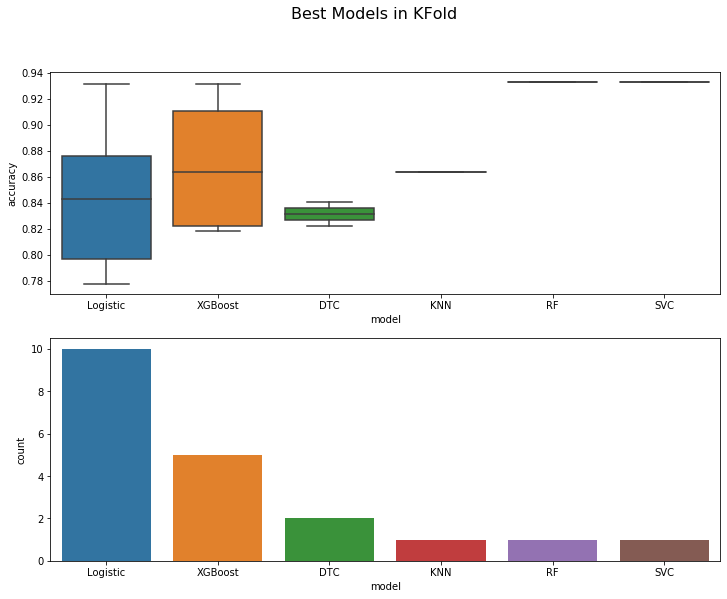

In [25]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
sns.boxplot(x='model', y='accuracy', data=optimal_kfold, order=ordered_model, ax=ax1)
sns.countplot(optimal_kfold['model'], order=ordered_model)
plt.suptitle('Best Models in KFold', fontsize=16)
plt.show()

## Predict Evaluation Set

### Run chosen model

In [39]:
model = xg
model.fit(X_train, y_train)
indexes = X_test.index
df_test['Survived'] = np.nan
df_test['Survived'] = model.predict(X_test)

In [40]:
filename = 'output/xg_opt8.csv'
df_test['Survived'] = df_test['Survived'].astype('int')
df_test[['Survived']].to_csv(filename)

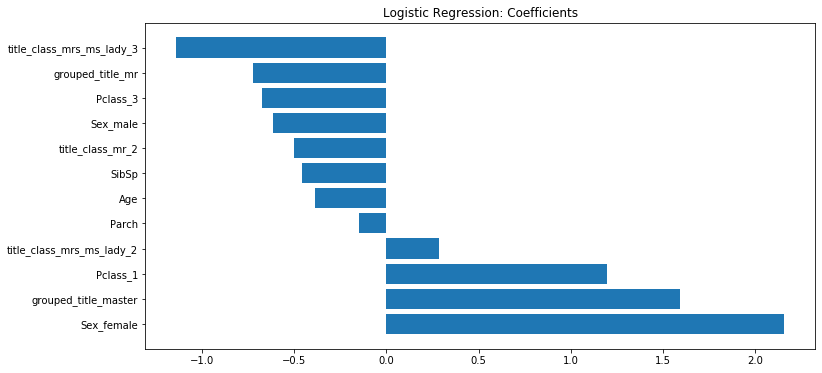

In [28]:
coefs = pd.DataFrame(lr.coef_.T, index=X_train.columns)
coefs.sort_values(0, ascending=False, inplace=True)
flags = abs(coefs[0])>0
plt.figure(figsize=(12, 6))
plt.barh(y=coefs[flags].index, width=coefs[flags][0])
plt.title('Logistic Regression: Coefficients')
plt.show()